In [1]:
pip install pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


Epoch 1/20
135/135 [==============================] - 25s 88ms/step - loss: 3.7874e-05 - val_loss: 0.0016
Epoch 2/20
135/135 [==============================] - 8s 62ms/step - loss: 2.0060e-06 - val_loss: 0.0020
Epoch 3/20
135/135 [==============================] - 9s 66ms/step - loss: 1.9807e-06 - val_loss: 0.0021
Epoch 4/20
135/135 [==============================] - 10s 71ms/step - loss: 1.9822e-06 - val_loss: 9.7272e-04
Epoch 5/20
135/135 [==============================] - 11s 85ms/step - loss: 2.0206e-06 - val_loss: 0.0010
Epoch 6/20
135/135 [==============================] - 17s 127ms/step - loss: 2.4823e-06 - val_loss: 5.0438e-04
Epoch 7/20
135/135 [==============================] - 9s 64ms/step - loss: 2.2360e-06 - val_loss: 3.3751e-04
Epoch 8/20
135/135 [==============================] - 8s 61ms/step - loss: 2.2235e-06 - val_loss: 8.0511e-04
Epoch 9/20
135/135 [==============================] - 8s 62ms/step - loss: 1.6758e-06 - val_loss: 3.3907e-04
Epoch 10/20
135/135 [=========

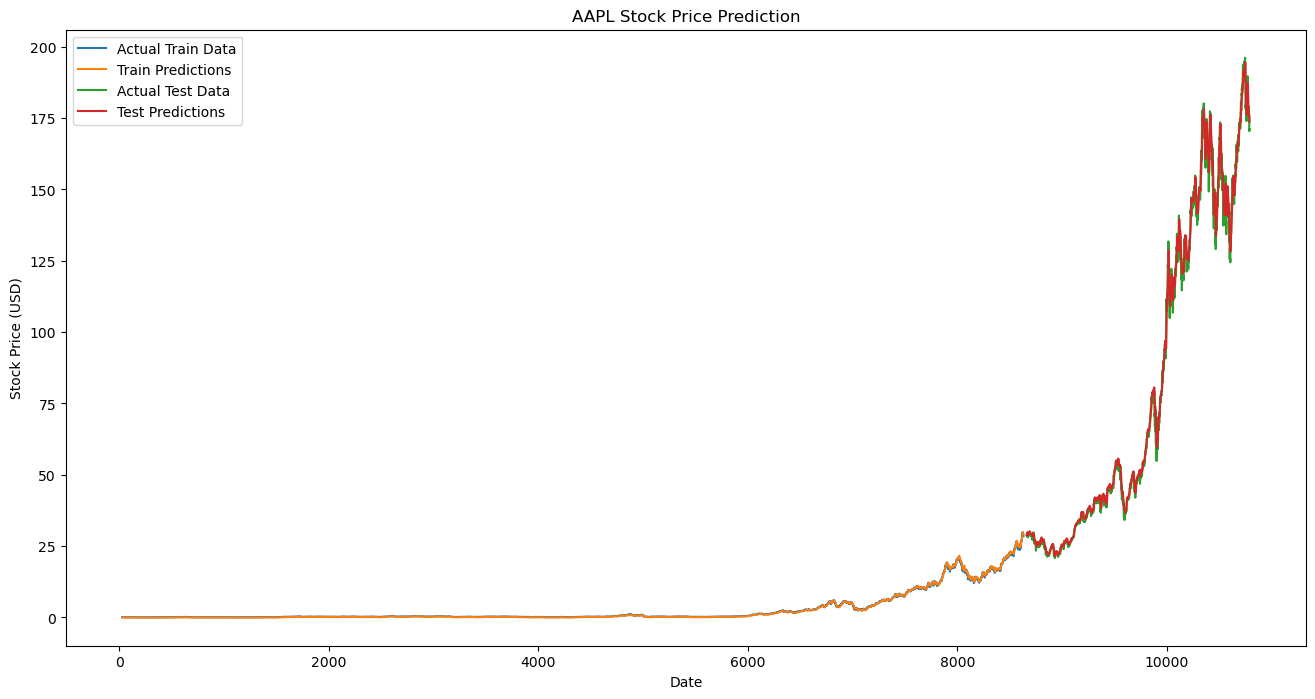

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load historical stock price data
# Replace 'AAPL' with the stock symbol of the company you want to predict
# You can obtain historical stock price data from sources like Yahoo Finance or Alpha Vantage
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2021-09-30'
url = f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1=0&period2=9999999999&interval=1d&events=history'
df = pd.read_csv(url)

# Display the first few rows of the data
df.head()

# Preprocess the data
data = df['Adj Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

seq_length = 30
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]
X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the scaled data to get actual stock prices
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
train_dates = df.index[seq_length:train_size]
test_dates = df.index[train_size+seq_length:]

plt.figure(figsize=(16, 8))
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.plot(train_dates, y_train, label='Actual Train Data')
plt.plot(train_dates, train_predictions, label='Train Predictions')
plt.plot(test_dates, y_test, label='Actual Test Data')
plt.plot(test_dates, test_predictions, label='Test Predictions')
plt.legend()
plt.show()
